### Name: Ntwali Bahongere  
#### Course: Advanced Big Data and Data Mining
#### Lab 2: Classification Using KNN and RNN Algorithms

In [18]:
#imports

from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import RadiusNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
data = load_wine()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [10]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# Display basic statistics for each feature
print(df.describe())



          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [20]:
# Show the number of samples per class
print("\nClass distribution:")
print(df['target'].value_counts())


Class distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


In [13]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#knn classifier with different k values
k_values = [1, 5, 11, 15, 21]
accuracies = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f'k={k}: Test Accuracy = {acc:.4f}')

accuracies

k=1: Test Accuracy = 0.7778
k=5: Test Accuracy = 0.8056
k=11: Test Accuracy = 0.8056
k=15: Test Accuracy = 0.8056
k=21: Test Accuracy = 0.8056


{1: 0.7777777777777778,
 5: 0.8055555555555556,
 11: 0.8055555555555556,
 15: 0.8055555555555556,
 21: 0.8055555555555556}

In [ ]:
#Radius Neighbors Classifier with different radius values
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = {}

for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label=None)
    rnn.fit(X_train, y_train)
    y_pred_rnn = rnn.predict(X_test)
    acc_rnn = accuracy_score(y_test, y_pred_rnn)
    rnn_accuracies[radius] = acc_rnn
    print(f'Radius={radius}: Test Accuracy = {acc_rnn:.4f}')

rnn_accuracies

Radius=350: Test Accuracy = 0.7222
Radius=400: Test Accuracy = 0.6944
Radius=450: Test Accuracy = 0.6944
Radius=500: Test Accuracy = 0.6944
Radius=550: Test Accuracy = 0.6667
Radius=600: Test Accuracy = 0.6667


{350: 0.7222222222222222,
 400: 0.6944444444444444,
 450: 0.6944444444444444,
 500: 0.6944444444444444,
 550: 0.6666666666666666,
 600: 0.6666666666666666}

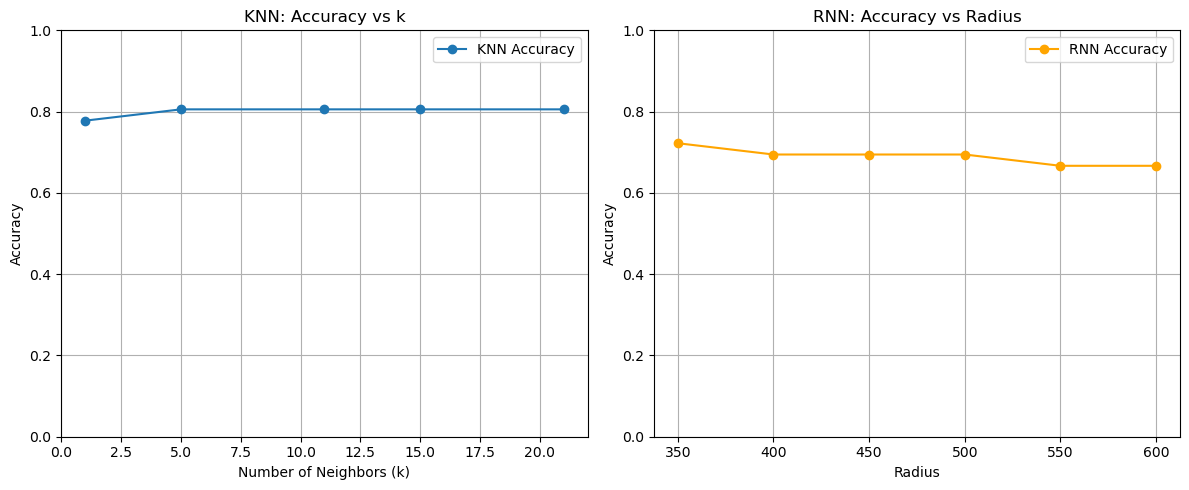

Best KNN accuracy: 0.8056 (k=5)
Best RNN accuracy: 0.7222 (radius=350)

Observation:
KNN achieves higher accuracy than RNN for this dataset and parameter ranges. KNN's accuracy is relatively stable for larger k values, while RNN's accuracy decreases as radius increases.

When to use KNN or RNN:
- KNN is preferable when the data is well-clustered and classes are balanced, as it is less sensitive to outliers and density variations.
- RNN may be preferable when the data has varying density or when you want to control the influence region explicitly, but it can be sensitive to the choice of radius and may perform poorly if the radius is not well-tuned.


In [19]:
# Plot accuracy trends for KNN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, [accuracies[k] for k in k_values], marker='o', label='KNN Accuracy')
plt.title('KNN: Accuracy vs k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

# Plot accuracy trends for RNN
plt.subplot(1, 2, 2)
plt.plot(radius_values, [rnn_accuracies[r] for r in radius_values], marker='o', color='orange', label='RNN Accuracy')
plt.title('RNN: Accuracy vs Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Comparison and discussion
best_knn_acc = max(accuracies.values())
best_rnn_acc = max(rnn_accuracies.values())

print(f"Best KNN accuracy: {best_knn_acc:.4f} (k={max(accuracies, key=accuracies.get)})")
print(f"Best RNN accuracy: {best_rnn_acc:.4f} (radius={max(rnn_accuracies, key=rnn_accuracies.get)})")

print("\nObservation:")
print("KNN achieves higher accuracy than RNN for this dataset and parameter ranges. KNN's accuracy is relatively stable for larger k values, while RNN's accuracy decreases as radius increases.")
print("\nWhen to use KNN or RNN:")
print("- KNN is preferable when the data is well-clustered and classes are balanced, as it is less sensitive to outliers and density variations.")
print("- RNN may be preferable when the data has varying density or when you want to control the influence region explicitly, but it can be sensitive to the choice of radius and may perform poorly if the radius is not well-tuned.")